# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']
n = x.shape[0]

In [5]:
'вычисляем среднее значение 𝜇=1𝑛∑𝑖=1𝑛𝑥𝑖;'
mu = np.mean(x, axis=0)

In [6]:
'центруем матрицу данных 𝑍=𝐷−1⋅𝜇𝑇;'
Z = x - mu.T

In [7]:
'вычисляем матрицу ковариаций 𝐾=1/𝑛(𝑍𝑇𝑍);'
K = np.cov(Z.T)
K

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [8]:
'вычисляем собственные значения (𝜆1,𝜆2,…,𝜆𝑑)'
'и собственные векторы 𝑈=(𝑢1𝑢2…𝑢𝑑)'
𝜆, u = np.linalg.eig(K)
𝜆, u

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [9]:
𝜆u = [[𝜆[i], u[i]] for i in range(x.shape[1])]
𝜆u.sort(key=lambda x: x[0], reverse=True)

In [10]:
r = 2
'выбираем 𝑟 первых векторов 𝑈=(𝑢1𝑢2…𝑢𝑟)'
vectors = np.array([𝜆u[i][1] for i in range(r)])

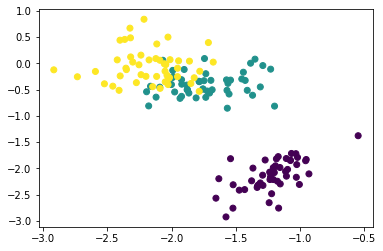

In [11]:
'уменьшаем признаковое пространство: 𝐴={𝑎𝑖|𝑎𝑖=𝑈𝑇𝑟𝑥𝑖,для𝑖=1,…,𝑛}'
dimension = np.dot(vectors, x.T)

plt.scatter(dimension[0], dimension[1], c = y)
plt.show()

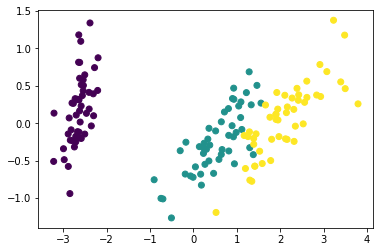

In [12]:
'Спроецируйте данные на плоскость образуемую этими векторами,'
'визуализируйте полученные результаты c метками классов.'
'Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.'

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(Z)
X_pca = pca.transform(Z)

plt.scatter(X_pca[:,0], X_pca[:,1], c = y)
plt.show()

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [32]:
np.corrcoef(x, vectors) 

array([[ 1.        ,  0.99599866,  0.99997391, ...,  0.63315839,
         0.06230154, -0.2324814 ],
       [ 0.99599866,  1.        ,  0.99660709, ...,  0.68483481,
         0.1132365 , -0.16398029],
       [ 0.99997391,  0.99660709,  1.        , ...,  0.6368058 ,
         0.06745736, -0.22792504],
       ...,
       [ 0.63315839,  0.68483481,  0.6368058 , ...,  1.        ,
        -0.00612012,  0.60557903],
       [ 0.06230154,  0.1132365 ,  0.06745736, ..., -0.00612012,
         1.        , -0.08149028],
       [-0.2324814 , -0.16398029, -0.22792504, ...,  0.60557903,
        -0.08149028,  1.        ]])

In [ ]:
'те величины, у которых корреляция Пирсона > 0,8 или < -0.8 относятся к первым двум признакам,'
'а остальные величины относятся к другой двойке признаков'